In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from collections import defaultdict
from scipy.stats import norm
import pickle

import my_graph_helpers as mgh
import my_graph as mg

In [2]:
reload(mgh)
reload(mg)

<module 'my_graph' from 'my_graph.pyc'>

In [65]:
def new_length(block,a,r,plot=False):
    myG = block.copy()    
    myG.define_roads()
    myG.define_interior_parcels()
    
    new_roads, bisect = mgh.build_all_roads(myG, barriers=False, alpha=a, wholepath=True)
    if plot:
        myG.plot_roads(master=block, new_road_width = 4, old_node_size=25, 
                       old_road_width = 6, barriers = False)
        plt.savefig('Figs/{0}_a{1}_r{2}.pdf'.format(myG.name,str(a),str(r)), format='pdf')
    plt.close('all')
    return new_roads


In [47]:
def nice_histogram(a,x,bounds=None):
    num_bins = 80
    if bounds is None:
        bounds=[x.min(),x.max()]
        
        
    textstr = 'alpha = {0} \n n={1} \n mu={2:.2f} \n sigma={3:.2f}'.format(a,len(x), 
                                                                            x.mean(), x.std())
    # the histogram of the data
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    n, bins, patches = plt.hist(x, num_bins, range=bounds, normed=1, cumulative=True,
                                facecolor='grey', alpha=0.5)
    # add a 'best fit' line
    y = norm(x.mean(), x.std()).cdf(bins)
    plt.plot(bins, y, 'r--')
    plt.xlabel('Length of new roads')
    plt.ylabel('Probability')
    plt.title(r'$\alpha = {0}$'.format(a))
    plt.text(0.05, .8,textstr, transform=ax.transAxes)
    #plt.savefig("histogram_alpha_"+str(a)+".pdf", format='pdf', pad_inches=0.5)

In [346]:
def nice_histogram_many(d, keys):
    num_bins = 30
    fig = plt.figure()
    #plt.vlines(x=1348.32, ymin=0, ymax=1, linewidth=3, colors='orange',linestyles='dashed')
    plt.vlines(x=101.75, ymin=0, ymax=1, linewidth=3, colors='orange',linestyles='dashed')
    for a in keys:
        n, bins, patches = plt.hist(d[a], num_bins, normed=1, cumulative=True,
                                    histtype = 'stepfilled', label = "{}".
                                    format(a), alpha=0.5)
        plt.legend(loc='lower right', title='alpha = ')

    plt.savefig("full_histogram_epworth_intoout.pdf", format='pdf', pad_inches=0.1)
    
    
#nice_histogram_many(d, [32, 64, 16, 128])

In [165]:
d[4]

[1524.9122112136215,
 1491.7213527362005,
 1501.2144138097017,
 1568.4507122416346,
 1487.9547984727135,
 1536.9073835849836,
 1499.1508837776769,
 1532.2360011930386,
 1556.5959264458697,
 1541.9237275393846,
 1485.3011486494977,
 1479.270070722115,
 1521.8587537494172,
 1493.9336571466768,
 1531.241535127436,
 1497.8402504520977,
 1519.4194413197349,
 1502.5047585668053,
 1516.3461560612373,
 1543.1082186844781,
 1472.2959434766947,
 1551.3135607942004,
 1488.5884912648633,
 1491.0141775322927,
 1579.2642444814896,
 1489.0269175209278,
 1510.8499205828559,
 1513.1484493089611,
 1504.9066393152332,
 1534.9917651733613]

In [55]:
### Import data
filename = "data/CapeTown"
place = "epworth"
erezero = np.array([305680, 8022350])
crezero= np.array([-31900, -3766370])
original = mgh.import_and_setup(0, filename, rezero=crezero,
                                threshold=1, connected=False,
                                name=place+"_S0")

data loaded


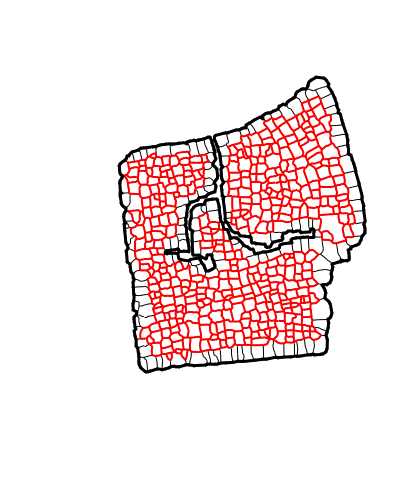

In [207]:
#myG = original.copy()    
#myG.define_roads()
#myG.define_interior_parcels()

fig = plt.figure(figsize=(8,8))
myG.plot_roads(master=myG, new_road_width = 2, old_node_size=4, old_road_width = 3,
               new_plot=False)

#plt.savefig("Figs/cape_block.pdf", format='pdf')


In [171]:
len(myG.inner_facelist)
len(myG.interior_parcels)

538-389

149

alpha = [0.5, 1, 2, 4, 16]
d=defaultdict(list)
d
for a in alpha:
    r = 0
    print "alpha = {}".format(a)
    for r in range(0,10):
        nr = new_length(myG,a,r, plot=True)
        d[a].append(nr)
        if r in [0,50,100,150]:
            print "r={}, alpha={}".format(r,a)
            
        r=+1
        pickle.dump(d, open( "results_outin.p", "wb" ))
        plt.close('all')

In [342]:
def merge_dict(orig, new):
    for key in new.keys():
        try:
            orig[key] = orig[key] + new[key]
        except:
            orig[key] = new[key]
            
    return orig


#d = pickle.load(open("full_results_in_to_out.p", "rb"))

d = pickle.load(open("epworth_alpha1.p", "rb"))

In [332]:
#pickle.dump(d, open( "full_results_in_to_out.p", "wb" ))


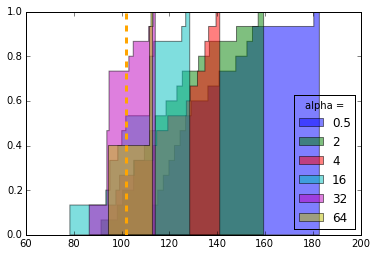

In [347]:
nice_histogram_many(d, [0.5,2,4,16,32,64])

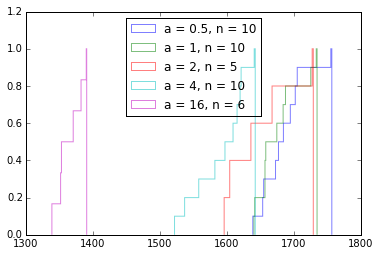

In [92]:
D1 = pickle.load( open( "d_results.p", "rb" ) )
D2 = pickle.load( open( "d_results2.p", "rb" ) )
D3 = pickle.load( open( "d_results3.p", "rb" ) )

D = D1.copy()
D.update(D2)

for key in D3.keys():
    try:
        D[key] = D[key] + D3[key]
    except:
        D[key] = D3[key]
        
D

#pickle.dump(d, open( "final_results_outsidein.p", "wb" ))

nice_histogram_many(D)

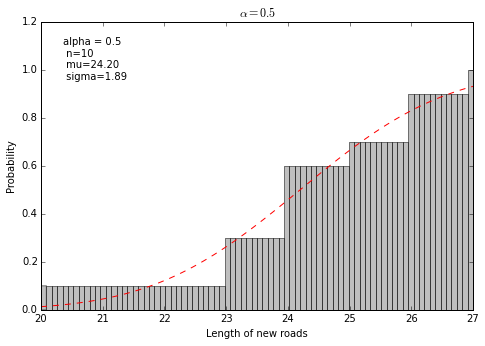

In [43]:
# d = pickle.load( open( "final_results_outsidein.p", "rb" ) )


bounds = {key:(min(val),max(val)) for key,val in d.iteritems()}

for a in d.keys():
    x = np.array(d[a])
    bound = bounds[a]
    nice_histogram(a, x, bounds[a])

In [103]:
d_compare={}
d_compare['16a'] = D[16]
d_compare['16b'] = d[16]

#d_compare['4a'] = D[4]
#d_compare['4b'] = d[4]

#d_compare['2a'] = D[2]
#d_compare['2b'] = d[2]

#d_compare['1a'] = D[1]
#d_compare['1b'] = d[1]

#d_compare['0.5a'] = D[0.5]
#d_compare['0.5b'] = d[0.5]




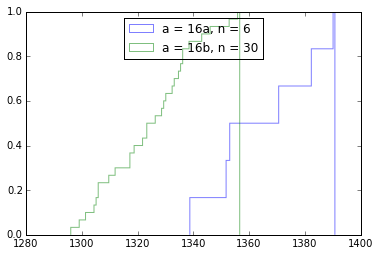

In [104]:
nice_histogram_many(d_compare)

In [209]:
duals = myG.stacked_duals()
stack = [duals[0],duals[1],duals[3],duals[5],duals[7],duals[9],duals[11]]


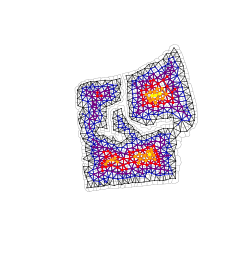

In [219]:

width = [0.25, 0.5, 0.5, 0.75, 0.75, 1, 1.5]
node_size = [0.1, 1, 1, 5, 7, 10, 12]
myG.plot_weak_duals(stack, width = width, node_size = node_size)


plt.savefig("Figs/cape_duals.pdf", format='pdf')


In [254]:
toydict = {}
toydict['a'] = 10
toydict['b'] = 3
toydict['c'] = 5
toydict["d"] = 7
toydict['e'] = 2
toydict['f'] = 15
toydict['g'] = 17
toydict['h'] = 12
toydict['i'] = 9
toydict['j'] = 11
toydict["k"] = 1




In [244]:
len(toydict)

11

In [248]:
result = {}
min(toydict, key=toydict.get)

while len(sdict) < 5:
    key = min(toydict, key=toydict.get)
    result[key] = toydict.pop(key)

In [252]:
from heapq import nsmallest

In [263]:
#vallist = [v for k,v in toydict.items]

nsmallest(5,toydict.items(), key = )

[('a', 10), ('b', 3), ('c', 5), ('d', 7), ('e', 2)]

In [267]:
a = 17.3453256245

In [268]:
a

17.3453256245

In [273]:
print "some text about {0:.2f}".format(a)

some text about 17.35
